# Step 8 Instacart Customer Profiling Questions

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Customer Profiling Questions](#2.-Customer-Profiling-Questions)
* [3. Importing Data](#3.-Importing-Data)
    * [3.1 Importing Libraries](#3.1-Importing-Libraries)
    * [3.2 Importing Data](#3.2-Importing-Data)
* [4. Distribution of Profiles](#4.-Distribution-of-Profiles)
* [5. Ordering Habits](#5.-Ordering-Habits)
* [6. Regions and Departments](#6.-Regions-and-Departments)
* [7. Recommendations](#7.-Recommendations)

The marketing and business strategy teams at Instacart are keen to develop more tailored marketing strategies by analyzing customer segments in their database. Consequently, after discussions, it was decided to create customer profiles based on three key factors: age, income, and the number of dependents, where dependents refer to the count of children per user. As a part of Step 7 IC Customer Profiling, the following variables were formulated:

- "age_profile" with categories "Young adult", "Adult", and "Retired".
- "dependents_profile" with categories "No kids" and "With kids".
- "income_profile" with categories "Low income", "Middle income", and "High income".

These classifications were merged to form 18 distinct customer profiles, which are encapsulated in the "customer_profile" variable. These profiles range from "Young adult, No kids, Low income" to "Retired, With kids, High income". Visualizations will be created to assist in answering Instacart's research queries regarding these customer profiles.


# 2. Customer Profiling Questions

- How are customer profiles distributed?

- Do customer profiles vary in their ordering patterns?

- Is there a connection between customer profiles and specific regions or departments?"

# 3. Importing Data

## 3.1 Importing Libraries

In [1]:
# Analytical
import pandas as pd
import numpy as np
import os

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 3.2 Importing Data

In [3]:
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'

### Customer Profiles

In [4]:
cust_profiling = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_cust_step7.pkl'))

In [5]:
cust_profiling.shape

(30992966, 19)

In [6]:
cust_profiling.head()

,order_id,user_id,days_since_prior_order,department_id,prices,Age,No._of_dependants,income,region,age_profile,dependents_profile,income_profile,customer_profile,mean_price_per_customer_profile,max_price_per_customer_profile,min_price_per_customer_profile,mean_usage_per_customer_profile,max_usage_per_customer_profile,min_usage_per_customer_profile
0,2539329,1,NaN,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
1,2398795,1,15.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
2,473747,1,21.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
3,2254736,1,29.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
4,431534,1,28.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0


In [7]:
# Creating subset to save RAM usage
variables = ['order_id', 'user_id', 'days_since_prior_order', 'department_id', 'prices', 'region', 'customer_profile']
cust_profiling = cust_profiling.loc[:, variables]

In [8]:
cust_profiling.shape

(30992966, 7)

In [9]:
cust_profiling.head()

,order_id,user_id,days_since_prior_order,department_id,prices,region,customer_profile
0,2539329,1,NaN,7,9.0,South,Adult_With kids_Low income
1,2398795,1,15.0,7,9.0,South,Adult_With kids_Low income
2,473747,1,21.0,7,9.0,South,Adult_With kids_Low income
3,2254736,1,29.0,7,9.0,South,Adult_With kids_Low income
4,431534,1,28.0,7,9.0,South,Adult_With kids_Low income


# 4. Distribution of Profiles

In [10]:
# Count of customer profiles
distribution = cust_profiling['customer_profile'].value_counts(dropna=False)

In [11]:
distribution

customer_profile
Adult_With kids_Middle income          11328954
Retired_With kids_Middle income         5442930
Adult_No kids_Middle income             3812244
Adult_With kids_Low income              2740559
Young adult_With kids_Middle income     1980497
Retired_No kids_Middle income           1796557
Adult_No kids_Low income                 926872
Young adult_With kids_Low income         926080
Retired_With kids_Low income             694263
Young adult_No kids_Middle income        643316
Young adult_No kids_Low income           307579
Retired_No kids_Low income               213220
Adult_With kids_High income               83414
Retired_With kids_High income             41653
Adult_No kids_High income                 29951
Retired_No kids_High income               14143
Young adult_With kids_High income          7525
Young adult_No kids_High income            3209
Name: count, dtype: int64

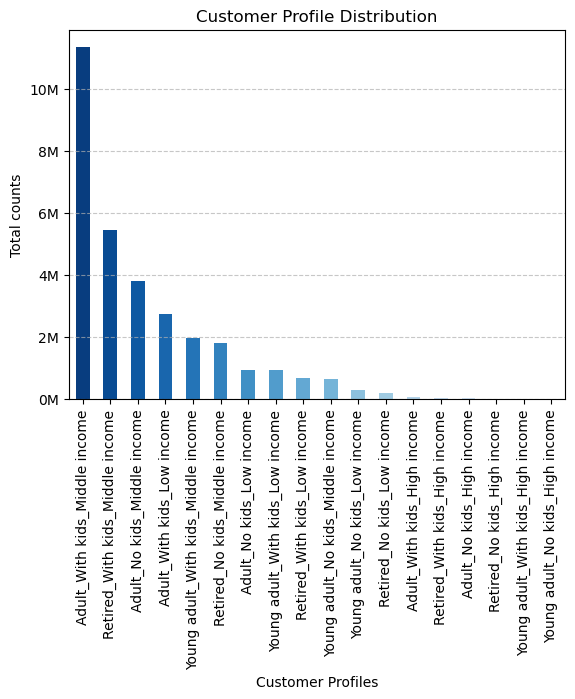

In [12]:
# Plotting frequency with a bar chart
# The larger the number is darker, smaller number is lighter.
colors = sns.color_palette("Blues", len(distribution))
colors = list(reversed(colors))

ax = distribution.plot.bar(color=colors)

# Title
plt.title("Customer Profile Distribution")

# X-axis label
plt.xlabel("Customer Profiles")

# Y-axis label
plt.ylabel("Total counts")

# Converting customer profiles to show in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_customer_profile_distributionstep9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show the plot
plt.show()

# 5. Ordering Habits

- Is there a differnce of ordering habits among different customer profiles?

## Expenditure

- Which customers would be likely to spend the most on the Instacart app?

In [15]:
# Total money spent per customer profile
total_prices_table = pd.pivot_table(cust_profiling, values='prices', index='customer_profile', aggfunc='sum').reset_index()

# Sort data in descending order
total_prices_table = total_prices_table.sort_values(by='prices', ascending=False)

total_prices_table.style.set_table_styles([{'selector': 'thead', 'props': [('display', 'none')]}])

,customer_profile,prices
5,Adult_With kids_Middle income,90148849.300000
11,Retired_With kids_Middle income,43343749.300000
2,Adult_No kids_Middle income,30336012.400000
4,Adult_With kids_Low income,19502405.700000
17,Young adult_With kids_Middle income,15754190.600000
8,Retired_No kids_Middle income,14301614.500000
16,Young adult_With kids_Low income,6898146.200000
1,Adult_No kids_Low income,6590383.900000
14,Young adult_No kids_Middle income,5116983.600000
10,Retired_With kids_Low income,4520494.500000


C:\Users\kuohe\AppData\Local\Temp\ipykernel_22996\3309342986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_profile', y='prices', data=total_prices_table, palette='viridis', order=total_prices_table.sort_values('prices', ascending=False)['customer_profile'])
C:\Users\kuohe\AppData\Local\Temp\ipykernel_22996\3309342986.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


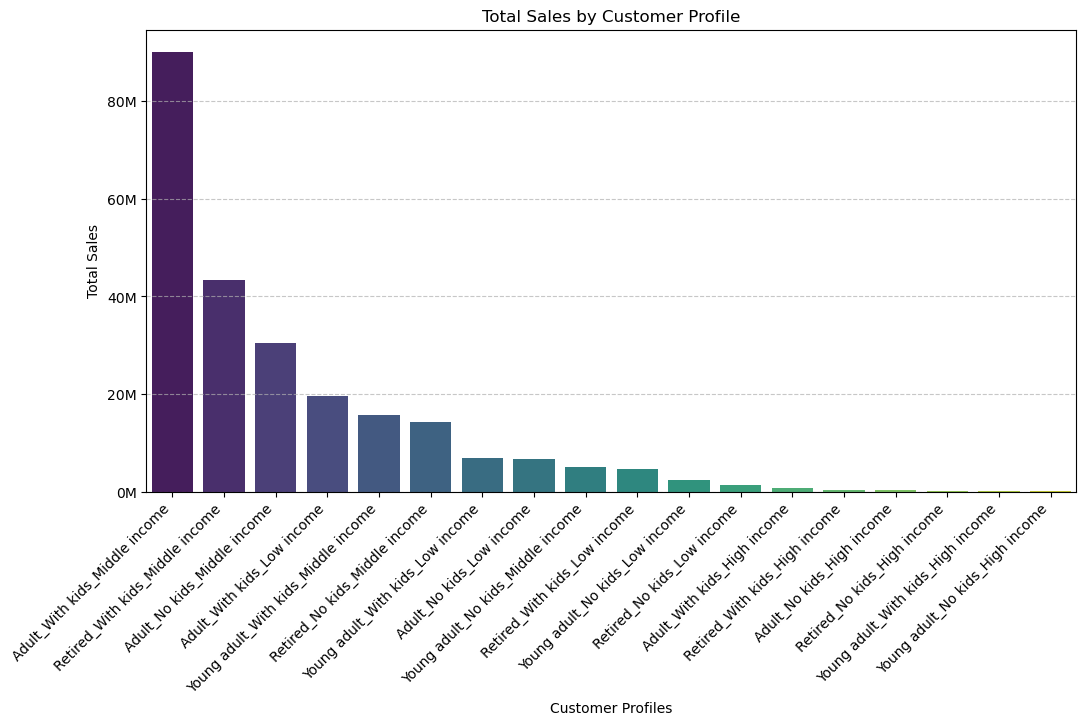

In [16]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_profile', y='prices', data=total_prices_table, palette='viridis', order=total_prices_table.sort_values('prices', ascending=False)['customer_profile'])
plt.title("Total Sales by Customer Profile")
plt.xlabel("Customer Profiles")
plt.ylabel("Total Sales")

# Converting the y-axis values to display in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_customer_profile_total_priceSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

## Usage Frequency

- Which customers based on their profile uses the Instacart the most frequently?

In [17]:
# Average usage depending on customer profile
usage_table = pd.pivot_table(cust_profiling, values='days_since_prior_order', index='customer_profile', aggfunc='mean').reset_index()

# Sort in descending order
usage_table = usage_table.sort_values(by='days_since_prior_order')

# Display the sorted table
usage_table.style.set_table_styles([{'selector': 'thead', 'props': [('display', 'none')]}])

,customer_profile,days_since_prior_order
0,Adult_No kids_High income,9.552416
6,Retired_No kids_High income,9.633782
15,Young adult_With kids_High income,9.690810
9,Retired_With kids_High income,10.280375
3,Adult_With kids_High income,10.363265
17,Young adult_With kids_Middle income,10.649799
8,Retired_No kids_Middle income,10.703718
2,Adult_No kids_Middle income,10.717566
11,Retired_With kids_Middle income,10.768141
5,Adult_With kids_Middle income,10.791625


C:\Users\kuohe\AppData\Local\Temp\ipykernel_22996\1207426632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_profile', y='days_since_prior_order', data=usage_table, palette='viridis', order=usage_table.sort_values('days_since_prior_order')['customer_profile'])
C:\Users\kuohe\AppData\Local\Temp\ipykernel_22996\1207426632.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


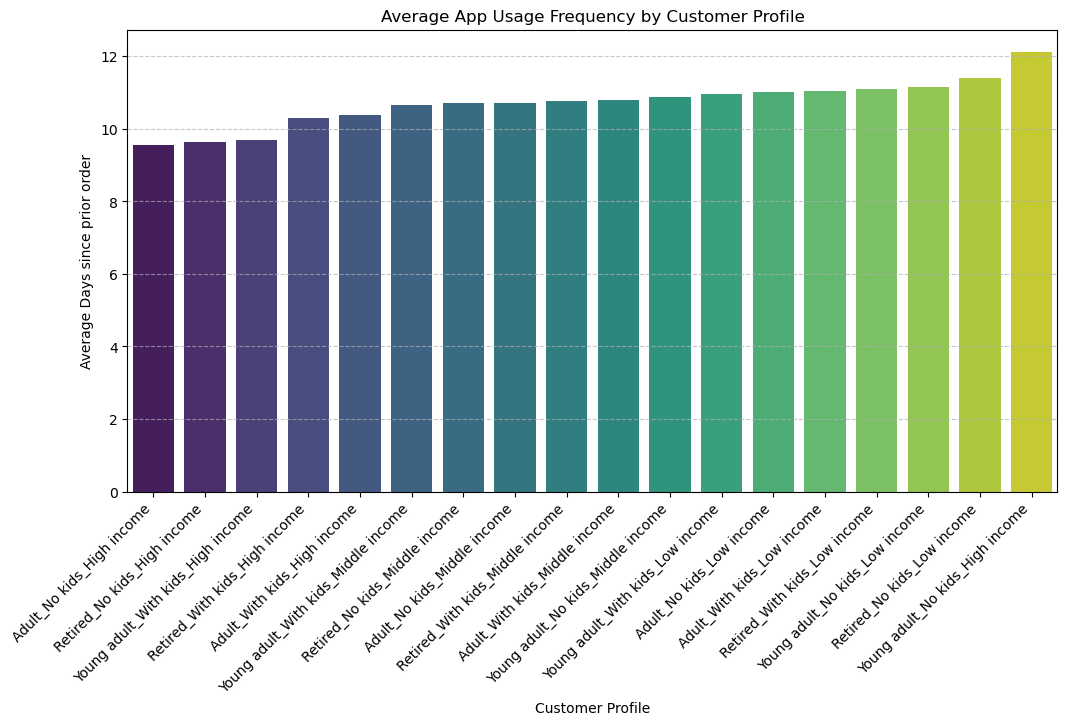

In [19]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_profile', y='days_since_prior_order', data=usage_table, palette='viridis', order=usage_table.sort_values('days_since_prior_order')['customer_profile'])
plt.title("Average App Usage Frequency by Customer Profile")
plt.xlabel("Customer Profile")
plt.ylabel("Average Days since prior order")

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_customer_profile_app_usage_frequencySTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 6. Regions and Departments

- Is there a connection between customer profile and where they are located?

## Region

- Where is our customer located?

In [20]:
# We need to join the region and customer_profile
region_profile_counts = cust_profiling.groupby(['region', 'customer_profile']).size().reset_index(name='profile_count')

# Sort profiles within each region by count in descending order
sorted_profiles = region_profile_counts.sort_values(by=['region', 'profile_count'], ascending=[True, False])

# Displaying results
sorted_profiles

,region,customer_profile,profile_count
5,Midwest,Adult_With kids_Middle income,2874571
11,Midwest,Retired_With kids_Middle income,1376075
2,Midwest,Adult_No kids_Middle income,997361
4,Midwest,Adult_With kids_Low income,689584
17,Midwest,Young adult_With kids_Middle income,502812
...,...,...,...
63,West,Retired_With kids_High income,9182
54,West,Adult_No kids_High income,5903
60,West,Retired_No kids_High income,2462
69,West,Young adult_With kids_High income,2195


In [21]:
# Filter the top 3 profiles per region
top_profiles_per_region = sorted_profiles.groupby('region').head(5)
top_profiles_per_region

,region,customer_profile,profile_count
5,Midwest,Adult_With kids_Middle income,2874571
11,Midwest,Retired_With kids_Middle income,1376075
2,Midwest,Adult_No kids_Middle income,997361
4,Midwest,Adult_With kids_Low income,689584
17,Midwest,Young adult_With kids_Middle income,502812
23,Northeast,Adult_With kids_Middle income,2002555
29,Northeast,Retired_With kids_Middle income,977659
20,Northeast,Adult_No kids_Middle income,637148
22,Northeast,Adult_With kids_Low income,482901
35,Northeast,Young adult_With kids_Middle income,357057


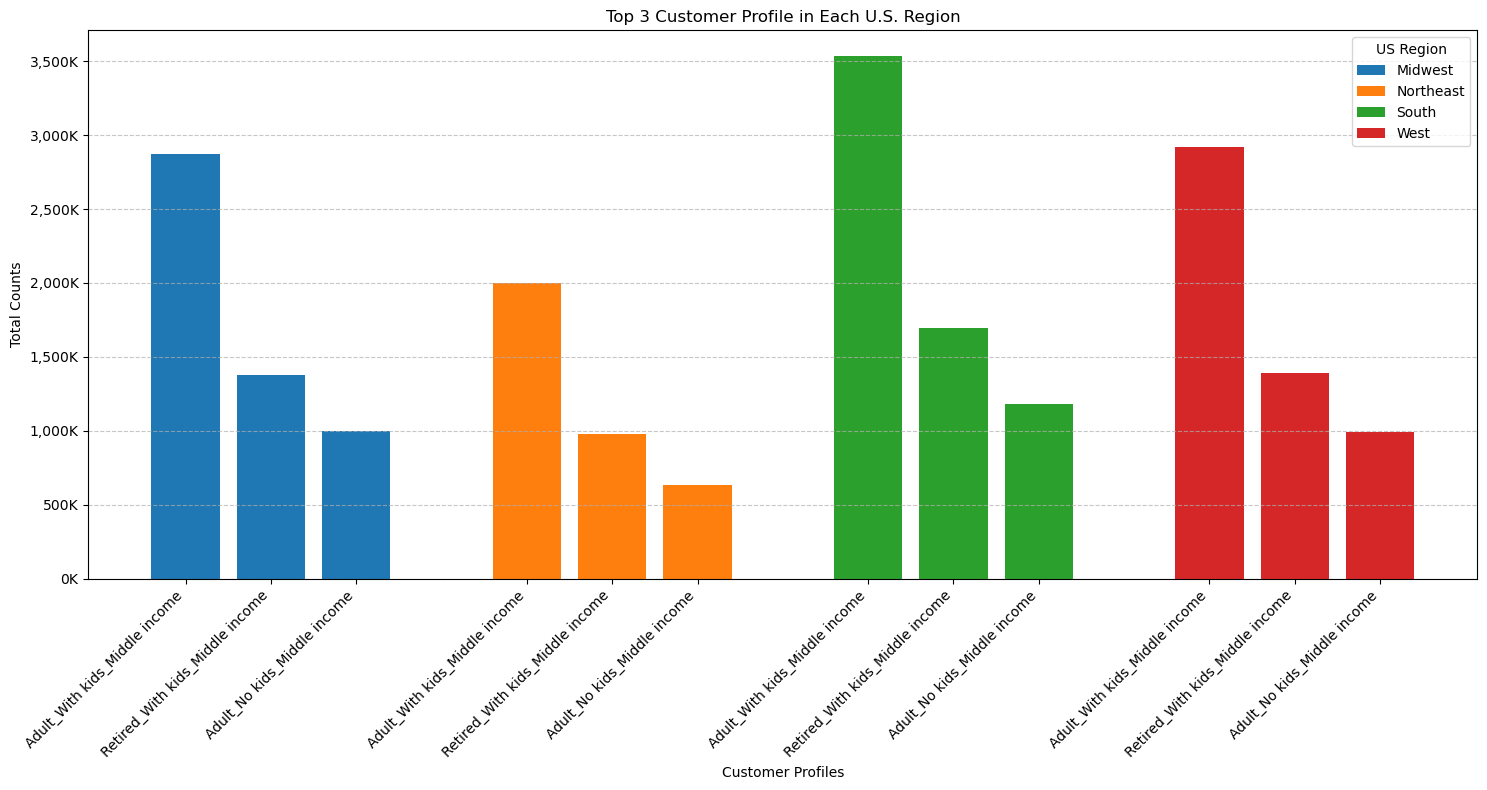

In [22]:
# Set up the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Create dataframse for the tick and positions
tick_positions = []
tick_labels = []

# Create statements for each region
for i, region in enumerate(sorted_profiles['region'].unique()):
    # Selecting top 3 region
    region_data = sorted_profiles[sorted_profiles['region'] == region].head(3)

    # Plot the data for the current region
    plt.bar(np.arange(len(region_data)) + i * 4, region_data['profile_count'], label=region)

    # For clarity and readability
    tick_positions.extend(np.arange(len(region_data)) + i * 4)
    tick_labels.extend(region_data['customer_profile'].tolist())

# Customize the plot
plt.title("Top 3 Customer Profile in Each U.S. Region")
plt.xlabel("Customer Profiles")
plt.ylabel("Total Counts")
plt.legend(title='US Region')
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.tight_layout()

# Changing y-axis to display values in thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

# Adding the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Saving png in directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_customer_profiles_regionsSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show the plot
plt.show()

## Departments

- Which groceries do our top 3 customer profile spend their money in?


In [23]:
# Create subset for saving memory
variables = ['order_id', 'user_id', 'department_id', 'prices', 'customer_profile']
cust_departments = cust_profiling.loc[:, variables]

In [24]:
cust_departments.shape

(30992966, 5)

In [26]:
cust_departments.head()

,order_id,user_id,department_id,prices,customer_profile
0,2539329,1,7,9.0,Adult_With kids_Low income
1,2398795,1,7,9.0,Adult_With kids_Low income
2,473747,1,7,9.0,Adult_With kids_Low income
3,2254736,1,7,9.0,Adult_With kids_Low income
4,431534,1,7,9.0,Adult_With kids_Low income


In [28]:
# Creating variables with the department names
# This is a dictionary for categories
# Cited from Instacart website
department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [29]:
# Checking if implemented
department_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [30]:
# Converting "department_id" to string for consistency
cust_departments['department_id'] = cust_departments['department_id'].astype(str)

In [31]:
# This is to connect "department_id" with "department_name"
cust_departments['department_name'] = cust_departments['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [32]:
# Checking results
cust_departments.head()

,order_id,user_id,department_id,prices,customer_profile,department_name
0,2539329,1,7,9.0,Adult_With kids_Low income,beverages
1,2398795,1,7,9.0,Adult_With kids_Low income,beverages
2,473747,1,7,9.0,Adult_With kids_Low income,beverages
3,2254736,1,7,9.0,Adult_With kids_Low income,beverages
4,431534,1,7,9.0,Adult_With kids_Low income,beverages


It was successful as "department_name" was implemented into the columns

In [33]:
# Counting values in "department_name" column
cust_departments['department_name'].value_counts(dropna = False)

department_name
produce            9079276
dairy eggs         5191364
snacks             2766406
beverages          2573822
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           677073
meat seafood        674785
personal care       424362
babies              410392
international       255991
alcohol             144627
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [34]:
# Checking to see if there are any errors among the "department_name" and "department_id"
cust_departments.groupby('department_name').agg({'department_id' : ['min', 'max']})

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

### Connecting Top Customers With Their Top Purchases in Specific Departments

In [35]:
# Checking variables
cust_departments['customer_profile'].unique()

array(['Adult_With kids_Low income', 'Retired_No kids_Low income',
       'Adult_With kids_Middle income', 'Retired_No kids_Middle income',
       'Retired_With kids_Middle income', 'Retired_With kids_Low income',
       'Young adult_With kids_Low income', 'Adult_No kids_Middle income',
       'Young adult_No kids_Low income', 'Adult_No kids_Low income',
       'Young adult_With kids_Middle income',
       'Young adult_No kids_Middle income', 'Adult_With kids_High income',
       'Retired_With kids_High income',
       'Young adult_With kids_High income', 'Adult_No kids_High income',
       'Young adult_No kids_High income', 'Retired_No kids_High income'],
      dtype=object)

In [36]:
# Creating a datafrom to filter customer profiles depending on their purchases
selected_profiles = ['Adult_With kids_Middle income', 'Retired_With kids_Middle income', 'Adult_No kids_Middle income']
filtered_df = cust_departments[cust_departments['customer_profile'].isin(selected_profiles)]

In [37]:
filtered_df.head()

,order_id,user_id,department_id,prices,customer_profile,department_name
131,2293453,19,7,9.0,Adult_With kids_Middle income,beverages
132,1973799,19,7,9.0,Adult_With kids_Middle income,beverages
133,532817,19,7,9.0,Adult_With kids_Middle income,beverages
134,2474845,19,19,1.6,Adult_With kids_Middle income,snacks
135,86918,19,4,8.8,Adult_With kids_Middle income,produce


In [38]:
filtered_df.shape

(20584128, 6)

In [39]:
# Grouping customer profile and department name and finding out the total of their purchases
grouped_df = filtered_df.groupby(['customer_profile', 'department_name'])['prices'].sum().reset_index()

In [40]:
grouped_df

,customer_profile,department_name,prices
0,Adult_No kids_Middle income,alcohol,149206.1
1,Adult_No kids_Middle income,babies,423959.7
2,Adult_No kids_Middle income,bakery,1134957.1
3,Adult_No kids_Middle income,beverages,2366495.6
4,Adult_No kids_Middle income,breakfast,669629.9
...,...,...,...
58,Retired_With kids_Middle income,pantry,2587036.5
59,Retired_With kids_Middle income,personal care,585474.6
60,Retired_With kids_Middle income,pets,132705.9
61,Retired_With kids_Middle income,produce,13195108.6


In [41]:
# Identify the top five departments for each customer profile based on pricing.
top_5_per_profile = grouped_df.groupby('customer_profile', group_keys=False).apply(lambda x: x.nlargest(5, 'prices'))
top_5_per_profile

,customer_profile,department_name,prices
19,Adult_No kids_Middle income,produce,9269569.7
7,Adult_No kids_Middle income,dairy eggs,5524601.7
3,Adult_No kids_Middle income,beverages,2366495.6
10,Adult_No kids_Middle income,frozen,2057379.7
16,Adult_No kids_Middle income,pantry,1798690.0
40,Adult_With kids_Middle income,produce,27443681.6
28,Adult_With kids_Middle income,dairy eggs,16337015.0
24,Adult_With kids_Middle income,beverages,7025713.7
31,Adult_With kids_Middle income,frozen,6148734.3
37,Adult_With kids_Middle income,pantry,5389653.1


In [42]:
# Customers who order again 
desired_order = ['Adult_With kids_Middle income', 'Retired_With kids_Middle income', 'Adult_No kids_Middle income']

top_5_per_profile['customer_profile'] = pd.Categorical(top_5_per_profile['customer_profile'], categories=desired_order, ordered=True)
top_5_per_profile = top_5_per_profile.sort_values('customer_profile')


top_5_per_profile

,customer_profile,department_name,prices
40,Adult_With kids_Middle income,produce,27443681.6
28,Adult_With kids_Middle income,dairy eggs,16337015.0
24,Adult_With kids_Middle income,beverages,7025713.7
31,Adult_With kids_Middle income,frozen,6148734.3
37,Adult_With kids_Middle income,pantry,5389653.1
61,Retired_With kids_Middle income,produce,13195108.6
49,Retired_With kids_Middle income,dairy eggs,7857715.7
45,Retired_With kids_Middle income,beverages,3380170.3
52,Retired_With kids_Middle income,frozen,2952811.1
58,Retired_With kids_Middle income,pantry,2587036.5


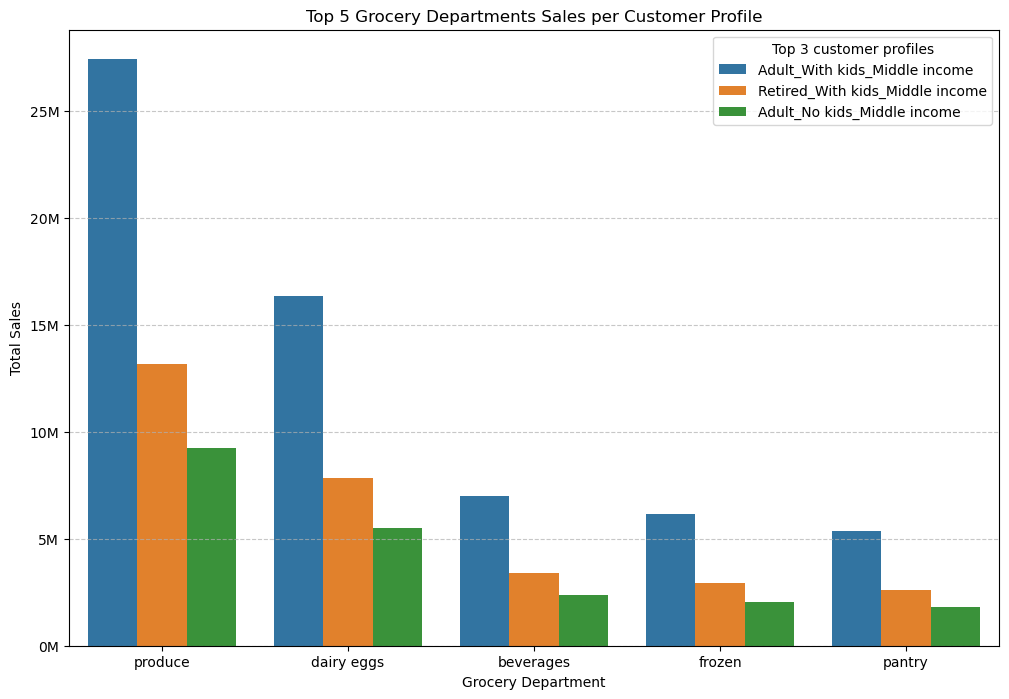

In [45]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='department_name', y='prices', hue='customer_profile', data=top_5_per_profile)
plt.title('Top 5 Grocery Departments Sales per Customer Profile')
plt.xlabel('Grocery Department')
plt.ylabel('Total Sales')

# Access axis after creating plot
ax = plt.gca()

# Converting the values of y-axis in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Changing title of the legend
plt.legend(title='Top 3 customer profiles')

# Save the png in the directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_customer_profiles_departmentsSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

plt.show()

# 7. Recommendations

For the Adults with Kids and Middle Income profile, Instacart can introduce a range of family-oriented product bundles that cater to the convenience and nutritional needs of a busy household. A subscription service for family essentials ensures that these households never run out of their most-used items, promoting consistent sales. Recognizing that time is a precious commodity, Instacart can also highlight ready-to-eat meals and pre-prepared produce to save customers valuable preparation time. Additionally, providing educational content, such as recipes that incorporate items from top-selling departments like produce and dairy, can inspire more frequent purchases.

When it comes to Retired with Kids and Middle Income customers, offering discounts or loyalty points can encourage repeat business and brand loyalty among retirees. Instacart should emphasize health-conscious and dietary-specific options, particularly in the produce and dairy departments, catering to the health needs of this demographic. Furthermore, an easy-to-navigate online platform and the convenience of home delivery can enhance the overall shopping experience for retirees, potentially increasing their frequency of orders.

For the Adults with No Kids and Middle Income group, focusing on the quality and value of products is key. This demographic may prioritize premium options, so Instacart should highlight the quality in their produce, dairy, and beverages. Personalized promotions based on past purchasing behaviors can engage these customers on a more individual level, while lifestyle-aligned marketing campaigns can promote organic, gourmet, or specialty items that resonate with their preferences.

Across all customer profiles, Instacart should employ data analytics to identify purchasing trends and tailor inventory to meet evolving consumer demands. Cross-promotion strategies can entice customers to explore and purchase from other departments that complement their usual shopping habits. Collecting and analyzing customer feedback is crucial for refining marketing strategies and adjusting them to better fit customer preferences. Finally, targeted digital advertising can effectively reach specific customer segments, providing them with information on products and deals that are most relevant to their unique needs, thus driving sales and bolstering revenue.